In [1]:
import pandas as pd

name = 'Breaking_36k'
file_name_path = './clean_ner/' + name + '.csv'
df1 = pd.read_csv(file_name_path).drop(['Unnamed: 0'],axis = 1)
df1

text  \
0      Why do republicans bear all the burden of clea...   
1      BREAKING: House Speaker Nancy Pelosi's house w...   
2      BREAKING: The break in at Nancy Pelosi’s house...   
3      BREAKING: Republican Gov. Glenn Youngkin disgu...   
4      BREAKING: Paul Pelosi is undergoing brain surg...   
...                                                  ...   
36014  Can we get more oil production please 🧡 BREAKI...   
36015  Good https://t.co/zNYGqzExmW BREAKING: A feder...   
36016  Whoa Breaking: A new Senate report concludes t...   
36017  Breaking News Alert: Digital News is a never-e...   
36018  This is to say that we have considered everyth...   

                                                  Entity  \
0      ['republicans', 'bear', 'cleaning', 'joe biden...   
1       ['house', 'nancy pelosi', 'broken', 'assaulted']   
2      ['nancy pelosi’s', 'suspected', 'targeted', 't...   
3      ['republican', 'glenn youngkin', 'responds', '...   
4      ['paul pelosi', 'undergoing', 'is', 'condemned...   
...                                                  ...   
36014  ['get', 'painted', '8:30am', 'today', 'sprayed...   
36015  ['friday', 'refused', 'bar', 'monitoring', 'ar...   
36016  ['senate', 'concludes', 'causes', 'resulted', ...   
36017                                         ['ending']   
36018  ['say', 'considered', 'ticks', 'condemn', 'pet...   

                                              Text clean                   id  
0      Why do republicans bear all the burden of clea...  1586065712283807744  
1      : House Speaker Nancy Pelosi's house was broke...  1586065712455421952  
2      : The break in at Nancy Pelosi’s house is susp...  1586065712510009346  
3      : Republican Gov. Glenn Youngkin disgustingly ...  1586065712728006656  
4      : Paul Pelosi is undergoing brain surgery. The...  1586065714091204608  
...                                                  ...                  ...  
36014  Can we get more oil production please : LUXURY...  1586249871136358403  
36015  Good : A federal judge Friday refused to bar a...  1586249886185689088  
36016  Whoa : A new Senate report concludes that SARS...  1586249894922137600  
36017   News Alert: Digital News is a never-ending abyss  1586249950454632448  
36018  This is to say that we have considered everyth...  1586249969576644608  

[36019 rows x 4 columns]

In [2]:
df1 = df1[df1.Entity != '[]']
df1 = df1.reset_index().drop(['index'],axis = 1)
df1

text  \
0      Why do republicans bear all the burden of clea...   
1      BREAKING: House Speaker Nancy Pelosi's house w...   
2      BREAKING: The break in at Nancy Pelosi’s house...   
3      BREAKING: Republican Gov. Glenn Youngkin disgu...   
4      BREAKING: Paul Pelosi is undergoing brain surg...   
...                                                  ...   
35310  Can we get more oil production please 🧡 BREAKI...   
35311  Good https://t.co/zNYGqzExmW BREAKING: A feder...   
35312  Whoa Breaking: A new Senate report concludes t...   
35313  Breaking News Alert: Digital News is a never-e...   
35314  This is to say that we have considered everyth...   

                                                  Entity  \
0      ['republicans', 'bear', 'cleaning', 'joe biden...   
1       ['house', 'nancy pelosi', 'broken', 'assaulted']   
2      ['nancy pelosi’s', 'suspected', 'targeted', 't...   
3      ['republican', 'glenn youngkin', 'responds', '...   
4      ['paul pelosi', 'undergoing', 'is', 'condemned...   
...                                                  ...   
35310  ['get', 'painted', '8:30am', 'today', 'sprayed...   
35311  ['friday', 'refused', 'bar', 'monitoring', 'ar...   
35312  ['senate', 'concludes', 'causes', 'resulted', ...   
35313                                         ['ending']   
35314  ['say', 'considered', 'ticks', 'condemn', 'pet...   

                                              Text clean                   id  
0      Why do republicans bear all the burden of clea...  1586065712283807744  
1      : House Speaker Nancy Pelosi's house was broke...  1586065712455421952  
2      : The break in at Nancy Pelosi’s house is susp...  1586065712510009346  
3      : Republican Gov. Glenn Youngkin disgustingly ...  1586065712728006656  
4      : Paul Pelosi is undergoing brain surgery. The...  1586065714091204608  
...                                                  ...                  ...  
35310  Can we get more oil production please : LUXURY...  1586249871136358403  
35311  Good : A federal judge Friday refused to bar a...  1586249886185689088  
35312  Whoa : A new Senate report concludes that SARS...  1586249894922137600  
35313   News Alert: Digital News is a never-ending abyss  1586249950454632448  
35314  This is to say that we have considered everyth...  1586249969576644608  

[35315 rows x 4 columns]

In [3]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [4]:
import ast

word = []
word_for_tweet = []
for i in range(len(df1)):
    # print(i)
    word.extend(ast.literal_eval(df1.Entity[i]))
    word_for_tweet.append(ast.literal_eval(df1.Entity[i]))
# print(word.count('back'))
word = list(f7(word))
print(len(word_for_tweet))

35315


In [5]:
graph = []
for i in range(len(word)):
    graph.append([0 for j in range(len(word))])

In [6]:
len(word)

23332

In [7]:
for i in range(len(word_for_tweet)):
    list_of_pairs = [(word_for_tweet[i][p1], word_for_tweet[i][p2]) for p1 in range(len(word_for_tweet[i])) for p2 in range(p1+1,len(word_for_tweet[i]))]
    # list_of_pairs = [(p1, p2) for p1 in word_for_tweet[i] for p2 in word_for_tweet[i]]
    for j in range(len(list_of_pairs)):
        graph[word.index(list_of_pairs[j][0])][word.index(list_of_pairs[j][1])] += 1
        graph[word.index(list_of_pairs[j][1])][word.index(list_of_pairs[j][0])] += 1

In [8]:
# df = pd.DataFrame(graph,columns = word) 
for i in range(len(graph)):
    graph[i][i] = 0
df = pd.DataFrame(graph) 
df

0      1      2      3      4      5      6      7      8      9      \
0          0      1      1      4      1     37      4     39     30      0   
1          1      0      1      1      1      1      1      0      0      0   
2          1      1      0      1      1      1      1      1      0      0   
3          4      1      1      0      1      3      2      7     15      0   
4          1      1      1      1      0      2      5      5      2      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
23327      0      0      0      0      0      0      0      0      0      0   
23328      0      0      0      0      0      0      0      0      0      0   
23329      0      0      0      0      0      0      0      0      0      0   
23330      0      0      0      0      0      0      0      0      0      0   
23331      0      0      0      0      0      0      0      0      0      0   

       ...  23322  23323  23324  23325  23326  23327  23328  23329  23330  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
23327  ...      0      0      0      1      1      0      1      1      1   
23328  ...      0      0      0      1      1      1      0      1      1   
23329  ...      0      0      0      1      1      1      1      0      1   
23330  ...      0      0      0      1      1      1      1      1      0   
23331  ...      0      0      0      0      0      0      0      0      0   

       23331  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
23327      0  
23328      0  
23329      0  
23330      0  
23331      0  

[23332 rows x 23332 columns]

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [10]:
# for i in range(len(graph)):
#     graph[i][i] = 0
#     for j in range(len(graph[i])):
#         if graph[i][j] <= 2:
#             graph[i][j] = 0 

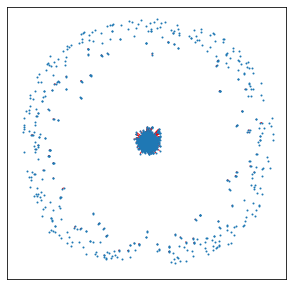

MultiGraph with 23332 nodes and 403770 edges


In [10]:
from matplotlib.pyplot import figure
figure(figsize=(5,5))
G = nx.from_numpy_matrix(np.matrix(graph), create_using=nx.MultiGraph)
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout,node_size=1)
nx.draw_networkx_edges(G,layout, edge_color='r')
plt.show()
print(nx.info(G))

In [11]:
G.edges()

MultiEdgeDataView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 40), (0, 42), (0, 43), (0, 44), (0, 45), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 59), (0, 62), (0, 63), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 76), (0, 79), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 99), (0, 102), (0, 113), (0, 114), (0, 115), (0, 116), (0, 117), (0, 118), (0, 119), (0, 120), (0, 123), (0, 125), (0, 127), (0, 128), (0, 129), (0, 130), (0, 131), (0, 132), (0, 133), (0, 134), (0, 135), (0, 138), (0, 143), (0, 148), (0, 152), (0, 153), (0, 158), (0, 165), (0, 171), (0, 172), (0, 173), (0, 174), (0, 175), (0, 176), (0

In [12]:
word_pair = [list(e) for e in G.edges()]
len(word_pair)

403770

In [13]:
print(list(nx.connected_components(G)))


[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [14]:
from community import community_louvain
partition = community_louvain.best_partition(G,random_state=69,weight='weight')

In [15]:
s = set( val for dic in partition for val in partition.values())
a = []
for i in s:
    a.append(sum(1 for v in partition.values() if v == i))
print(a)

[1906, 794, 774, 1130, 2877, 938, 805, 1171, 1371, 419, 584, 346, 663, 749, 779, 1245, 1442, 889, 2035, 619, 964, 326, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1,

In [16]:
len(a)

401

In [17]:
cluster_of_word = [ [] for i in range(len(a))]
cluster_of_no_word = [ [] for i in range(len(a))]
# for i in range(len(a)):
#     cluster_of_word.append([])
for i in range(len(partition.keys())):
    cluster_of_word[partition[i]].append(word[i])
    cluster_of_no_word[partition[i]].append(i)

In [18]:
cluster_of_no_word[0]

[0,
 3,
 5,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 30,
 31,
 35,
 42,
 44,
 45,
 52,
 53,
 54,
 55,
 56,
 57,
 62,
 92,
 94,
 126,
 151,
 189,
 190,
 191,
 192,
 211,
 249,
 270,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 316,
 317,
 318,
 321,
 325,
 337,
 338,
 339,
 355,
 356,
 357,
 358,
 359,
 369,
 370,
 371,
 399,
 401,
 402,
 403,
 404,
 408,
 415,
 422,
 424,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 434,
 506,
 509,
 510,
 521,
 525,
 531,
 532,
 546,
 571,
 586,
 594,
 600,
 629,
 643,
 658,
 667,
 671,
 674,
 719,
 757,
 761,
 762,
 764,
 770,
 771,
 780,
 781,
 785,
 802,
 804,
 805,
 827,
 867,
 885,
 905,
 911,
 935,
 979,
 997,
 1009,
 1010,
 1027,
 1031,
 1061,
 1078,
 1086,
 1088,
 1089,
 1090,
 1099,
 1124,
 1154,
 1177,
 1179,
 1207,
 1238,
 1254,
 1278,
 1283,
 1290,
 1319,
 1334,
 1338,
 1342,
 1354,
 1398,
 1399,
 1422,
 1424,
 1425,
 1479,
 1498,
 1499,
 1512,
 1517,
 1527,
 1543,
 1545,
 1547,
 1548,
 1549

In [19]:
len(cluster_of_word[1])

794

In [20]:
cluster = []
for i in range(len(word_for_tweet)):
    intersection = []
    for j in range(len(cluster_of_word)):
        intersection.append(len(list(set(word_for_tweet[i]) & set(cluster_of_word[j]))))
    # print(len(intersection))
    index_of_max_intersection = [index for index, item in enumerate(intersection) if item == max(intersection)]
    print(i,index_of_max_intersection)
    # if len(index_of_max_intersection) == 1:
    #     cluster.append(index_of_max_intersection[0])
    # else:
    #     len_of_cluster = []
    #     for i in range(len(index_of_max_intersection)):
    #         len_of_cluster.append(len(cluster_of_word[index_of_max_intersection[i]]))
    #     # print(len_of_cluster)
    #     idx_least_len_cluster = [index for index, item in enumerate(len_of_cluster) if item == min(len_of_cluster)] #in case more than 1 cluster in it
    #     # print(idx_least_len_cluster)
    #     cluster.append(idx_least_len_cluster[0])
    cluster.append(index_of_max_intersection)
# cluster

0 [0]
1 [0]
2 [0]
3 [0]
4 [0]
5 [4]
6 [0]
7 [1]
8 [0]
9 [4]
10 [4]
11 [0]
12 [1]
13 [4]
14 [4]
15 [0]
16 [11]
17 [4]
18 [9]
19 [5]
20 [4]
21 [4]
22 [8]
23 [2]
24 [7]
25 [16]
26 [19]
27 [4]
28 [10]
29 [11]
30 [4]
31 [4]
32 [8]
33 [0]
34 [0]
35 [16]
36 [17]
37 [4]
38 [5]
39 [15]
40 [4]
41 [8]
42 [4]
43 [7]
44 [8]
45 [16]
46 [4]
47 [4]
48 [4]
49 [0]
50 [16]
51 [9]
52 [18]
53 [4]
54 [9]
55 [0]
56 [0]
57 [1]
58 [0]
59 [15]
60 [4]
61 [4]
62 [4]
63 [0]
64 [11]
65 [0]
66 [10]
67 [0]
68 [8]
69 [0, 6]
70 [5]
71 [16]
72 [0]
73 [4]
74 [16]
75 [4]
76 [0]
77 [0]
78 [10]
79 [4]
80 [4]
81 [15]
82 [8]
83 [0]
84 [4]
85 [0]
86 [4]
87 [3]
88 [0]
89 [4]
90 [2]
91 [15]
92 [4]
93 [15]
94 [0]
95 [0]
96 [4]
97 [19]
98 [0]
99 [15]
100 [10]
101 [16]
102 [7]
103 [8]
104 [4]
105 [17]
106 [13]
107 [9]
108 [4]
109 [19]
110 [4]
111 [3]
112 [18]
113 [7]
114 [0]
115 [10]
116 [17]
117 [4]
118 [4]
119 [0]
120 [17]
121 [0]
122 [10]
123 [12]
124 [4]
125 [12]
126 [1]
127 [4]
128 [8]
129 [18]
130 [10]
131 [18]
132 [0, 4]
133

In [21]:
cluster

[[0],
 [0],
 [0],
 [0],
 [0],
 [4],
 [0],
 [1],
 [0],
 [4],
 [4],
 [0],
 [1],
 [4],
 [4],
 [0],
 [11],
 [4],
 [9],
 [5],
 [4],
 [4],
 [8],
 [2],
 [7],
 [16],
 [19],
 [4],
 [10],
 [11],
 [4],
 [4],
 [8],
 [0],
 [0],
 [16],
 [17],
 [4],
 [5],
 [15],
 [4],
 [8],
 [4],
 [7],
 [8],
 [16],
 [4],
 [4],
 [4],
 [0],
 [16],
 [9],
 [18],
 [4],
 [9],
 [0],
 [0],
 [1],
 [0],
 [15],
 [4],
 [4],
 [4],
 [0],
 [11],
 [0],
 [10],
 [0],
 [8],
 [0, 6],
 [5],
 [16],
 [0],
 [4],
 [16],
 [4],
 [0],
 [0],
 [10],
 [4],
 [4],
 [15],
 [8],
 [0],
 [4],
 [0],
 [4],
 [3],
 [0],
 [4],
 [2],
 [15],
 [4],
 [15],
 [0],
 [0],
 [4],
 [19],
 [0],
 [15],
 [10],
 [16],
 [7],
 [8],
 [4],
 [17],
 [13],
 [9],
 [4],
 [19],
 [4],
 [3],
 [18],
 [7],
 [0],
 [10],
 [17],
 [4],
 [4],
 [0],
 [17],
 [0],
 [10],
 [12],
 [4],
 [12],
 [1],
 [4],
 [8],
 [18],
 [10],
 [18],
 [0, 4],
 [18],
 [0],
 [0],
 [3],
 [11],
 [4],
 [18],
 [4],
 [4],
 [0],
 [1],
 [8, 12],
 [18],
 [0],
 [4],
 [0],
 [4],
 [16],
 [15],
 [0],
 [0],
 [4],
 [11],
 [19],
 [0

In [22]:
max(map(max, cluster))

400

In [23]:
no_tweet_cluster = [0 for i in range(max(map(max, cluster))+1)]
for i in range(len(cluster)):
    # print(cluster[i])
    for j in range(len(cluster[i])):
        no_tweet_cluster[cluster[i][j]] = no_tweet_cluster[cluster[i][j]] + 1

In [25]:
# sum([row.count(218) for row in cluster]) 

In [24]:
print(no_tweet_cluster)

[5698, 1143, 1391, 1098, 8713, 1371, 976, 1640, 2365, 717, 832, 1060, 1037, 938, 873, 2324, 1480, 1684, 3294, 853, 1448, 335, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [41]:
name = 'Breaking_36k'
file_name_path = './clean_ner/' + name + '.csv'
df = pd.read_csv(file_name_path).drop(['Unnamed: 0'],axis = 1)

In [42]:
df1['cluster'] = cluster
df1['id'] = df['id']

In [43]:
df1

text  \
0      Why do republicans bear all the burden of clea...   
1      BREAKING: House Speaker Nancy Pelosi's house w...   
2      BREAKING: The break in at Nancy Pelosi’s house...   
3      BREAKING: Republican Gov. Glenn Youngkin disgu...   
4      BREAKING: Paul Pelosi is undergoing brain surg...   
...                                                  ...   
35310  Can we get more oil production please 🧡 BREAKI...   
35311  Good https://t.co/zNYGqzExmW BREAKING: A feder...   
35312  Whoa Breaking: A new Senate report concludes t...   
35313  Breaking News Alert: Digital News is a never-e...   
35314  This is to say that we have considered everyth...   

                                                  Entity  \
0      ['republicans', 'bear', 'cleaning', 'joe biden...   
1       ['house', 'nancy pelosi', 'broken', 'assaulted']   
2      ['nancy pelosi’s', 'suspected', 'targeted', 't...   
3      ['republican', 'glenn youngkin', 'responds', '...   
4      ['paul pelosi', 'undergoing', 'is', 'condemned...   
...                                                  ...   
35310  ['get', 'painted', '8:30am', 'today', 'sprayed...   
35311  ['friday', 'refused', 'bar', 'monitoring', 'ar...   
35312  ['senate', 'concludes', 'causes', 'resulted', ...   
35313                                         ['ending']   
35314  ['say', 'considered', 'ticks', 'condemn', 'pet...   

                                              Text clean                   id  \
0      Why do republicans bear all the burden of clea...  1586065712283807744   
1      : House Speaker Nancy Pelosi's house was broke...  1586065712455421952   
2      : The break in at Nancy Pelosi’s house is susp...  1586065712510009346   
3      : Republican Gov. Glenn Youngkin disgustingly ...  1586065712728006656   
4      : Paul Pelosi is undergoing brain surgery. The...  1586065714091204608   
...                                                  ...                  ...   
35310  Can we get more oil production please : LUXURY...  1586240879907348480   
35311  Good : A federal judge Friday refused to bar a...  1586240902522994691   
35312  Whoa : A new Senate report concludes that SARS...  1586240934911647745   
35313   News Alert: Digital News is a never-ending abyss  1586240956285988864   
35314  This is to say that we have considered everyth...  1586240966494593024   

      cluster  
0         [0]  
1         [0]  
2         [0]  
3         [0]  
4         [0]  
...       ...  
35310     [2]  
35311    [17]  
35312     [8]  
35313    [12]  
35314    [13]  

[35315 rows x 5 columns]

In [44]:
df.to_csv('./test_word_graph.csv')

In [45]:
df1.to_csv('./test_cluster.csv')

In [46]:
cluster_of_word[5]

['saying',
 'last night',
 'rnc',
 'ronna mcdaniel',
 'mocked',
 'john fetterman',
 'biden',
 'finish',
 'ronna',
 'attacking',
 'exceed',
 'filed',
 'garland',
 'posted',
 'produced',
 'my pillow',
 'mike lindell',
 'alleging',
 '2020',
 'stolen',
 'arrested',
 'put',
 'comes',
 'david depepe',
 'berkeley',
 'the republican party',
 'win',
 'has',
 'indicating',
 'herschel walker',
 'gloria allred',
 'walker',
 'jan 6',
 'julie green',
 'replaced',
 'sayeth',
 'covid',
 'zimbabweans',
 'running',
 'warn',
 'tips',
 'the amazon rainforest',
 'pretend',
 'joe rogan',
 'god',
 'michigan state football',
 'kennito walkerino',
 'weekend',
 'michigan',
 'america',
 '1869',
 'participating',
 'shows',
 'tampa bay times',
 'tampa bay',
 'represent',
 '2019',
 'karine jean',
 'possesses',
 'gathering',
 'katie hobbs',
 'regulated',
 'classified',
 'guide',
 'sept 2020',
 'stopped',
 'reading',
 'george floyd',
 'christ',
 'pittsburgh public safety',
 'setting',
 'canada',
 'judicial watch',
 '

In [47]:
file_name = '../' + 'cluster_of_word'  + '.txt'
with open(file_name, 'w', encoding="utf-8") as f:
    for status in cluster_of_word:
        f.write(str(status) + '\n')

In [29]:
G[0][1][0]

{'weight': 1}

In [48]:
pr = sorted(nx.pagerank(G,weight='weight').items(), key=lambda l:l[1], reverse=True)
for i in range(len(pr)):
    pr[i] = list(pr[i])
for i in range(len(pr)):
    pr[i][0] = word[pr[i][0]]
pr

[['twitter', 0.013491115864876172],
 ['elon musk', 0.0106923071711189],
 ['paul pelosi', 0.007705010108179398],
 ['rt', 0.005336060530671406],
 ['have', 0.005192041439107688],
 ['trump', 0.0049830540027668265],
 ['says', 0.004800688304394356],
 ['fired', 0.004464711776058376],
 ["'s", 0.004263112536947968],
 ['pelosi', 0.004219775991239408],
 ['’s', 0.004018462324619102],
 ['get', 0.003946491592408177],
 ['today', 0.0038670760076282206],
 ['going', 0.0036881234520490303],
 ['senate', 0.0033605759043726416],
 ['house', 0.0031720726942495725],
 ['go', 0.0030793026800844895],
 ['got', 0.0029997840367800713],
 ['attacked', 0.0028696626483763767],
 ['pull', 0.002808910722055811],
 ['nancy', 0.0027897914929953596],
 ['said', 0.0027725037229694134],
 ['has', 0.002766260835357032],
 ['made', 0.0027643839606059507],
 ['do', 0.002649141036751986],
 ['related', 0.0026311419913975635],
 ['the wuhan institute of virology', 0.002563121696727793],
 ['thank', 0.0025468514511965386],
 ['includes', 0.00

In [49]:
pair_of_word_of_each_cluster = []
for i in range(len(a)):
    edge = []
    for j in range(len(word_pair)):
        if word_pair[j][0] in cluster_of_no_word[i] and word_pair[j][1] in cluster_of_no_word[i]:
            edge.append(word_pair[j])
    pair_of_word_of_each_cluster.append(edge)

In [50]:
G0 = nx.Graph()
for i in range(len(pair_of_word_of_each_cluster)):
    G0.add_edge(pair_of_word_of_each_cluster[0][i][0],pair_of_word_of_each_cluster[0][i][1])
# G0.add_edge(1,2)

In [51]:
pair_of_word_of_each_cluster

[[[0, 3],
  [0, 5],
  [0, 7],
  [0, 8],
  [0, 10],
  [0, 11],
  [0, 12],
  [0, 13],
  [0, 14],
  [0, 15],
  [0, 16],
  [0, 17],
  [0, 18],
  [0, 19],
  [0, 20],
  [0, 21],
  [0, 22],
  [0, 24],
  [0, 25],
  [0, 26],
  [0, 27],
  [0, 30],
  [0, 31],
  [0, 35],
  [0, 42],
  [0, 44],
  [0, 45],
  [0, 52],
  [0, 53],
  [0, 54],
  [0, 55],
  [0, 56],
  [0, 57],
  [0, 62],
  [0, 92],
  [0, 94],
  [0, 189],
  [0, 190],
  [0, 191],
  [0, 192],
  [0, 211],
  [0, 249],
  [0, 270],
  [0, 297],
  [0, 298],
  [0, 299],
  [0, 300],
  [0, 301],
  [0, 302],
  [0, 303],
  [0, 317],
  [0, 318],
  [0, 325],
  [0, 355],
  [0, 356],
  [0, 357],
  [0, 358],
  [0, 359],
  [0, 369],
  [0, 370],
  [0, 371],
  [0, 403],
  [0, 404],
  [0, 415],
  [0, 422],
  [0, 426],
  [0, 427],
  [0, 430],
  [0, 521],
  [0, 546],
  [0, 629],
  [0, 671],
  [0, 719],
  [0, 761],
  [0, 762],
  [0, 770],
  [0, 785],
  [0, 802],
  [0, 804],
  [0, 827],
  [0, 867],
  [0, 885],
  [0, 905],
  [0, 911],
  [0, 979],
  [0, 997],
  [0, 10

In [52]:
pr_each_cluster = []
for j in range(len(pair_of_word_of_each_cluster)):
    G0 = nx.Graph()
    for i in range(len(pair_of_word_of_each_cluster[j])):
        n1 = pair_of_word_of_each_cluster[j][i][0]
        n2 = pair_of_word_of_each_cluster[j][i][1]
        # print(n1,n2)
        G0.add_edge(n1,n2,weight = G[n1][n2][0]['weight'])
    pr = sorted(nx.pagerank(G0).items(), key=lambda l:l[1], reverse=True)
    for i in range(len(pr)):
        pr[i] = list(pr[i])
        pr[i][0] = word[pr[i][0]]
        # pr[i] = dict([pr[i]])
    pr_each_cluster.append(pr)

In [ ]:
for i in range(len(pr_each_cluster)):
    dict_of_pr = {}
    for j in range(len(pr_each_cluster[i])):
        dict_of_pr[pr_each_cluster[i][j][0]] = pr_each_cluster[i][j][1]
    pr_each_cluster[i] = dict_of_pr

In [36]:
pr_each_cluster[0]

{'paul pelosi': 0.060957765977248154,
 'pelosi': 0.027785640341035634,
 'house': 0.026333757009856386,
 'nancy': 0.023991448865564504,
 'attacked': 0.020539178429609593,
 'nancy pelosi': 0.01762011391432829,
 'nancy pelosi’s': 0.017113840926154388,
 'san francisco': 0.0130142116087852,
 'republican': 0.012869350690978327,
 'assaulted': 0.012365663116896604,
 "'s": 0.012361760572026842,
 'got': 0.012023043765563401,
 'said': 0.011226415912430817,
 'looking': 0.011190583151421676,
 'tell': 0.011166289368218504,
 'broke': 0.01062174225764865,
 'confirms': 0.010536522227678216,
 'targeted': 0.010449318310476354,
 'trying': 0.010249255512692214,
 'suspected': 0.00982941928955088,
 'entered': 0.009564008126946928,
 'carrying': 0.009456948254480279,
 'abc news': 0.009356754710930953,
 'cnn': 0.008942404385877784,
 'undergoing': 0.008923105356987695,
 "nancy pelosi's": 0.008787546966533144,
 'sliding': 0.008473369231002097,
 'msnbc': 0.007976969918693276,
 'tie': 0.0072246082036436085,
 'waiti

In [ ]:
file_name = '../' + 'page_rank'  + '.txt'
with open(file_name, 'w', encoding="utf-8") as f:
    for status in pr_each_cluster:
        f.write(str(status) + '\n')